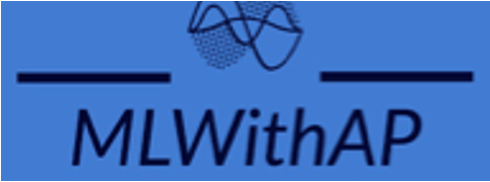

# Array Sorting 

There are many sorting alogirthms.

Sorting is an important DS concept.


Let's see how Numpy Sorting works ?


A simple example of **selection sort** in basic Python looks like below

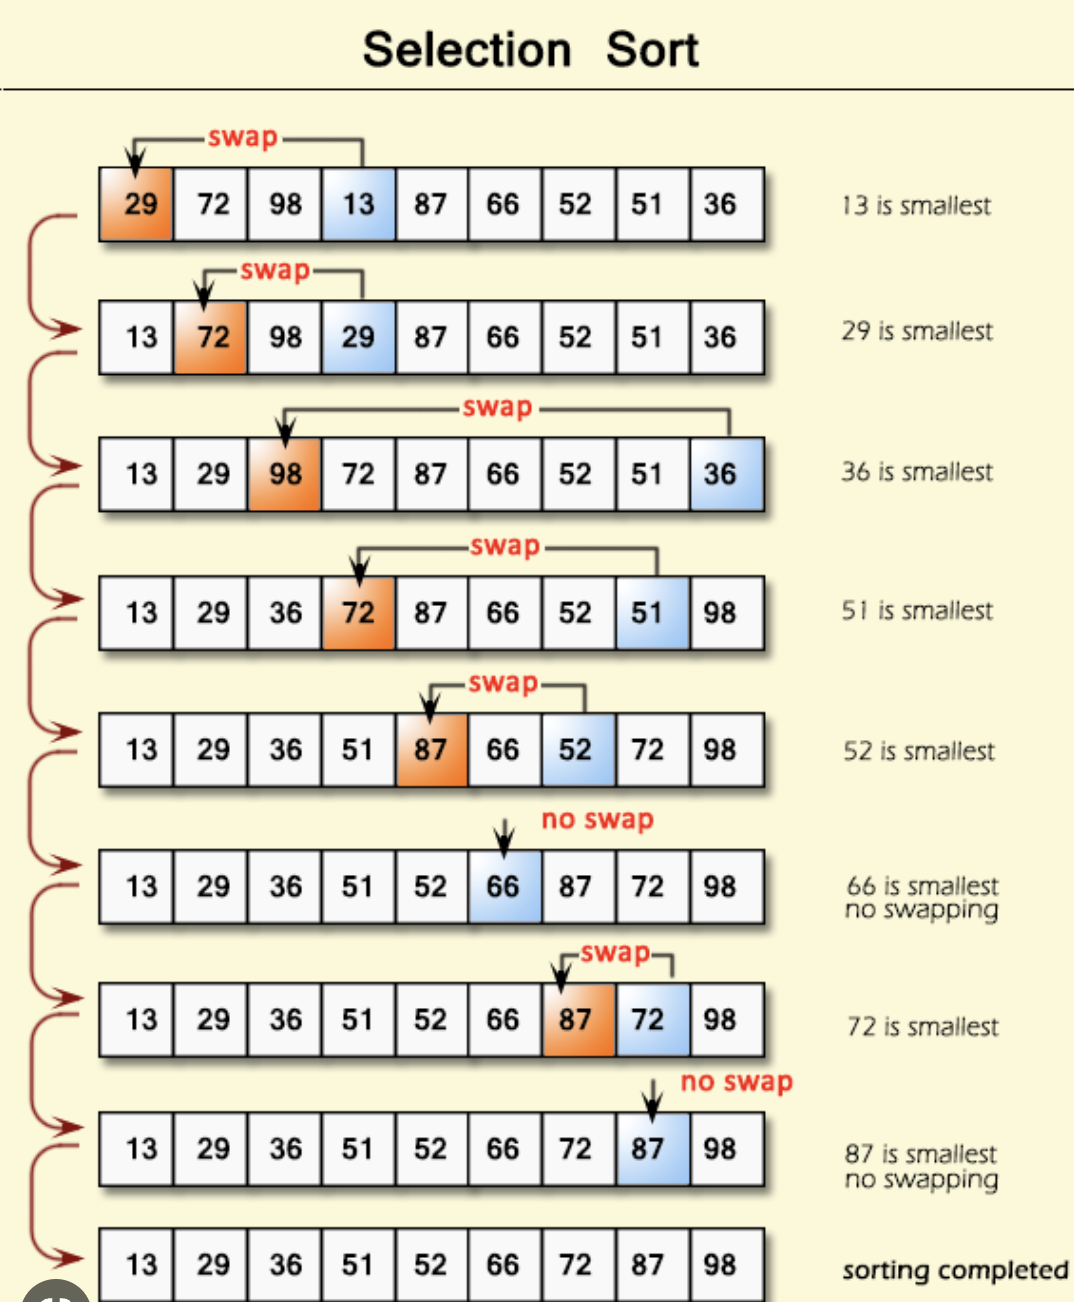

In [75]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        print("Array" , x)
        print("Index" , i)
        swap = i + np.argmin(x[i:])
        print("Arg Min ", np.argmin(x[i:]))
        print("Swap", swap)
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [76]:
x = np.array([6, 3, 4, 1, 0])
selection_sort(x)

Array [6 3 4 1 0]
Index 0
Arg Min  4
Swap 4
Array [0 3 4 1 6]
Index 1
Arg Min  2
Swap 3
Array [0 1 4 3 6]
Index 2
Arg Min  1
Swap 3
Array [0 1 3 4 6]
Index 3
Arg Min  0
Swap 3
Array [0 1 3 4 6]
Index 4
Arg Min  0
Swap 4


array([0, 1, 3, 4, 6])


What's the time complexity for selection sort ?

N^2

Why ?

Two loops !


In [77]:
def selection_sort(x):
    n = len(x)
    for i in range(n):
        # Find the index of the minimum element in the remaining unsorted part of the array
        swap = i
        for j in range(i+1, n):
            if x[j] < x[swap]:
                swap = j
        # Swap the minimum element with the current element
        x[i], x[swap] = x[swap], x[i]

    return x


In [78]:
x = np.array([6, 3, 4, 1, 0])
selection_sort(x)

array([0, 1, 3, 4, 6])


## Both Python and Numpy has built in - Faster sorting algorithms

In [79]:
import numpy as np

# Generate a random array of 10,000 integers
arr = np.random.randint(0, 10000, size=10000)

# Sort the array using Python's built-in sort() function
%timeit sorted_arr = sorted(arr)

# Sort the array using NumPy's sort() function
%timeit sorted_arr = np.sort(arr)


2.65 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
327 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Looks like np.sort is much faster !!

By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [81]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)


array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

In [82]:
x.sort()
print(x)

[1 2 3 4 5]


In [83]:
dir(x)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [84]:
# Generate a random array of 10,000 integers
x = np.random.randint(0, 10000, size=10000)

# New array
%timeit np.sort(x)

# Inplace 
%timeit x.sort()

332 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
56.9 µs ± 545 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


looks like inplace sorting is faster

A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [86]:
x = np.array([21, 11, 41, 31, 51])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [66]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [87]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [89]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [90]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. 

In [92]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [93]:
np.sort(x)

array([1, 2, 3, 4, 5, 6, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [94]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [96]:
np.partition(X, 3, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [2, 1, 4, 5, 7, 7],
       [0, 4, 1, 5, 9, 5]])

In [74]:
np.partition(X, 3, axis=1)[:,3].reshape(4,1)

array([[6],
       [6],
       [5],
       [5]])